# Implementation Practice.1
## Forward and Backward Propagation with $y = \theta x$

***
### Dataset Generation
NumPy를 이용하여 다음과 같은 x_data, y_data를 만드시오.

| Data Index | Study Hour | Math Score |
|:-:|:-:|:-:|
|0|1|1|
|1|2|2|
|2|3|3|
|3|4|4|
|4|5|5|


In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.arange(1,6)
y_data = np.arange(1,6)

print(x_data, y_data)

[1 2 3 4 5] [1 2 3 4 5]


**Expected Output:**
    

[1 2 3 4 5] [1 2 3 4 5]


***
### Node Implementation
다음은 plus node의 예제이다.

우리의 model이 $y = \theta x$였을 때, $(x^{(1)},y^{(1)}) $에 대하여 loss를 구하는 과정은 다음과 같다.

Step1: $ z_{1}^{(1)} = \theta x^{(1)} $

Step2: $ z_{2}^{(1)} = y^{(1)} - z_{1}^{(1)} $

Step3: $ L^{(1)} = (z_{2}^{(1)})^{2} $


위의 과정을 forward propagation이라하며, 차례대로 곱셈, 뺄셈, 제곱이 이루어진다.

그러면 위의 과정 외에 forward-propagation 및 backpropagation을 연습하기 위하여 덧셈, 뺄셈, 곱셈, 제곱에 대한 node를 만들어 각각 forward, backward 기능을 추가해보자. <br><br>

forward() method는 input들을 더하여 다음 node로 보내주는 역할을 하며

backward() method는 output 쪽에서 propagated된 loss에 대한 gradient를 받아 자신의 gradient를 곱하여 input 쪽으로 넘겨준다. 즉

$ z = x + y$에 대하여 $\frac{\partial z}{\partial x} = 1$, $\frac{\partial z}{\partial y} = 1$ 이므로 Chain rule에 의해 Output node 쪽에서 넘어온 dL과 1, 1을 곱해 앞단으로 $1*dL$, $1*dL$을 넘겨주는 코드이다.

In [3]:
class PlusNode():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x + y
        return self.z
    def backward(self, dL):
        return 1*dL, 1*dL

class MinusNode():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        self.z = x - y
        return self.z
        
    def backward(self, dL):
        return dL, -dL
        

class MulNode():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        self.z = x * y
        return self.z
        
    def backward(self, dL):
        return self.y * dL, self.x * dL
        
class SquareNode():
    def __init__(self):
        self.x, self.z = None, None
    def forward(self, x):
        self.x = x
        self.z = x ** 2
        return self.z
        
    def backward(self, dL):
        return self.x * dL * 2

test_plus = PlusNode()
print("plus node(forward):", test_plus.forward(3, 4))
print("plus node(backward):", test_plus.backward(5), '\n')

test_minus = MinusNode()
print("minus node(forward):", test_minus.forward(3, 4))
print("minus node(backward):", test_minus.backward(5), '\n')

test_mul = MulNode()
print("multiplication node(forward):", test_mul.forward(3, 4))
print("multiplication node(backward):", test_mul.backward(5), '\n')

test_square = SquareNode()
print("square node(forward):", test_square.forward(3))
print("square node(backward):", test_square.backward(5), '\n')

plus node(forward): 7
plus node(backward): (5, 5) 

minus node(forward): -1
minus node(backward): (5, -5) 

multiplication node(forward): 12
multiplication node(backward): (20, 15) 

square node(forward): 9
square node(backward): 30 



**Expected Output:**

plus node(forward): 7 <br>
plus node(backward): (5, 5) <br><br>

minus node(forward): -1 <br>
minus node(backward): (5, -5) <br><br>

multiplication node(forward): 12 <br>
multiplication node(backward): (20, 15) <br><br> 

square node(forward): 9 <br>
square node(backward): 30 


***
### Forward & Backward Propagation and Parameter Update
위의 node들을 이용하여 전체 model을 만들고, forward propagation, backward propagation을 구현하여 $\theta$를 update하는 코드를 작성하시오  
<img src="./images/image1.png" width = 1200>

In [18]:
class MyModel():
    def __init__(self, theta, lr, mul_node, minus_node, square_node):
        self.theta = theta 
        self.mul_node = mul_node
        self.minus_node = minus_node
        self.square_node = square_node
        self.lr = lr
    
    def forward(self, x, y):
        y_hat = self.mul_node.forward(x, self.theta)
        error = self.minus_node.forward(y, y_hat)
        loss = self.square_node.forward(error)
        return y_hat, loss
        
    def backward(self, loss):
        dError = self.square_node.backward(loss)
        dY, dY_hat = self.minus_node.backward(dError)
        dX, dTheta = self.mul_node.backward(dY_hat)
        self.theta -= self.lr * dTheta
        return self.theta

Text(0.5, 1.0, 'theta')

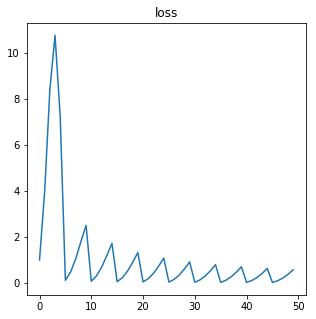

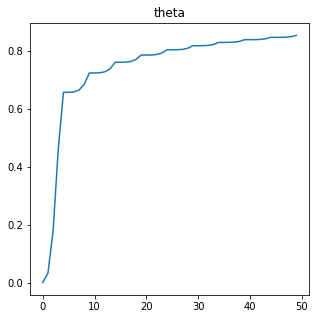

In [20]:
theta = 0
lr = 0.001
epochs = 10

model = MyModel(theta=theta, lr=lr,
               mul_node=MulNode(),
               minus_node=MinusNode(),
               square_node=SquareNode())

loss_list = []
theta_list = []
for _ in range(epochs):
    for x, y in zip(x_data, y_data):
        y_hat, loss = model.forward(x, y)
        theta = model.backward(loss)
        loss_list.append(loss)
        theta_list.append(theta)
        
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(loss_list)
ax.set_title("loss")

fig, ax = plt.subplots(figsize = (5,5))
ax.plot(theta_list)
ax.set_title("theta")

**Expected Output:**

<img src="./images/1_1_image1.png" width = 400>

<img src="./images/1_1_image2.png" width = 400>

**Q1) 위의 결과에서 Loss와 theta 모두 부드러운 곡선의 형태가 나타나지 않는 이유를 분석하시오** <br>  
미니배치 처리가 아닌, 1개씩 Loss를 계산해서 반영했기 때문에 평균적으로 반영하는 것이 아닌,  
각 데이터에 대해서 하나하나 다 반영하기 때문에 부드러운 곡선이 나오지 않는 것으로 생각한다.



